# Machine Failure Prediction

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

KeyboardInterrupt: 

#Reading csv file

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')

In [ ]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
df.rename(columns={'Failure Type':'Type of Failure'},inplace=True)

In [ ]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                    1551         42.8                0       0   
1                    1408         46.3                3       0   
2                    1498         49.4                5       0   
3                    1433         39.5                7       0   
4                    1408         40.0                9       0   

  Type of Failure  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.drop(['UDI', 'Product ID'], axis=1,inplace=True)

In [ ]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Type of Failure  
0         42.8                0       0      No Failure  
1         46.3                3       0      No Failure  
2         49.4                5       0      No Failure  
3         39.5                7       0      No Failure  
4         40.0                9       0      No Failure

In [ ]:
gkk = df.groupby(['Type','Type of Failure'])

In [ ]:
gkk.first()

Air temperature [K]  Process temperature [K]  \
Type Type of Failure                                                          
H    Heat Dissipation Failure                302.3                    310.9   
     No Failure                              298.4                    308.9   
     Overstrain Failure                      302.8                    312.4   
     Power Failure                           296.6                    307.7   
     Random Failures                         298.4                    307.7   
     Tool Wear Failure                       296.9                    307.8   
L    Heat Dissipation Failure                302.3                    310.9   
     No Failure                              298.2                    308.7   
     Overstrain Failure                      298.4                    308.2   
     Power Failure                           298.9                    309.1   
     Random Failures                         298.6                    309.8   
     Tool Wear Failure                       298.8                    308.9   
M    Heat Dissipation Failure                300.8                    309.4   
     No Failure                              298.1                    308.6   
     Overstrain Failure                      302.6                    311.6   
     Power Failure                           298.2                    308.5   
     Random Failures                         297.0                    308.3   
     Tool Wear Failure                       298.4                    308.0   

                               Rotational speed [rpm]  Torque [Nm]  \
Type Type of Failure                                                 
H    Heat Dissipation Failure                    1366         48.4   
     No Failure                                  1782         23.9   
     Overstrain Failure                          1411         53.8   
     Power Failure                               1386         62.3   
     Random Failures                             1626         31.1   
     Tool Wear Failure                           1549         35.8   
L    Heat Dissipation Failure                    1377         46.8   
     No Failure                                  1408         46.3   
     Overstrain Failure                          1282         60.7   
     Power Failure                               2861          4.6   
     Random Failures                             1505         45.7   
     Tool Wear Failure                           1455         41.3   
M    Heat Dissipation Failure                    1342         62.4   
     No Failure                                  1551         42.8   
     Overstrain Failure                          1227         68.2   
     Power Failure                               2678         10.7   
     Random Failures                             1399         46.4   
     Tool Wear Failure                           1416         38.2   

                               Tool wear [min]  Target  
Type Type of Failure                                    
H    Heat Dissipation Failure              130       1  
     No Failure                             24       0  
     Overstrain Failure                    246       1  
     Power Failure                         100       1  
     Random Failures                       166       0  
     Tool Wear Failure                     206       1  
L    Heat Dissipation Failure              166       1  
     No Failure                              3       0  
     Overstrain Failure                    216       1  
     Power Failure                         143       1  
     Random Failures                       144       0  
     Tool Wear Failure                     208       1  
M    Heat Dissipation Failure              113       1  
     No Failure                              0       0  
     Overstrain Failure                    187       1  
     Power Failure                          86       1  
     Random Failures   

In [ ]:
cat_df = df.select_dtypes(include='object')

Observation -

1. 'L' Type of machine has highest Failure Rate

2. Type of Machine has lowest Failure rate

undefined. No Failure rate is 96.5% 

In [ ]:
num_df = df.select_dtypes(include='float64')

In [ ]:
num_df

Air temperature [K]  Process temperature [K]  Torque [Nm]
0                   298.1                    308.6         42.8
1                   298.2                    308.7         46.3
2                   298.1                    308.5         49.4
3                   298.2                    308.6         39.5
4                   298.2                    308.7         40.0
...                   ...                      ...          ...
9995                298.8                    308.4         29.5
9996                298.9                    308.4         31.8
9997                299.0                    308.6         33.4
9998                299.0                    308.7         48.5
9999                299.0                    308.7         40.2

[10000 rows x 3 columns]

#Univariate Analysis

Categorical Data Analysis

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

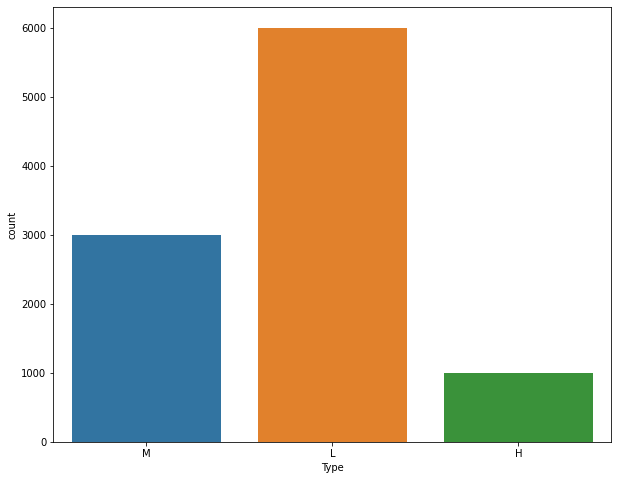

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(df['Type'])

<AxesSubplot:ylabel='Type'>

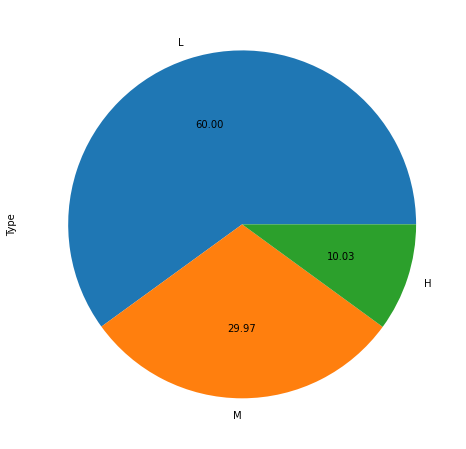

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
df['Type'].value_counts().plot(kind='pie',autopct='%.2f')

Numerical Data Analysis using Univariate

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Type of Failure'],
      dtype='object')

In [ ]:
plt.hist(df['Process temperature [K]'],bins=20)

(array([  42.,   56.,   26.,   97.,  292.,  551.,  839.,  816.,  824.,
         868.,  812.,  912., 1101.,  843.,  702.,  439.,  325.,  203.,
         184.,   68.]),
 array([305.7  , 306.105, 306.51 , 306.915, 307.32 , 307.725, 308.13 ,
        308.535, 308.94 , 309.345, 309.75 , 310.155, 310.56 , 310.965,
        311.37 , 311.775, 312.18 , 312.585, 312.99 , 313.395, 313.8  ]),
 <BarContainer object of 20 artists>)

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Process temperature [K]', ylabel='Density'>

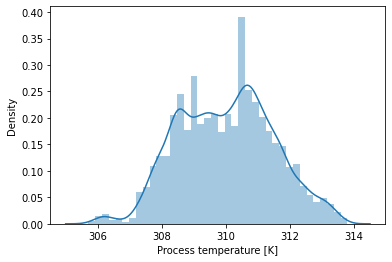

In [ ]:
sns.distplot(df['Process temperature [K]'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

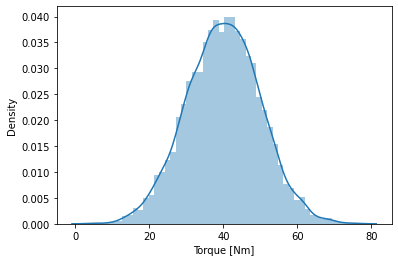

In [ ]:
sns.distplot(df['Torque [Nm]'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Air temperature [K]'>

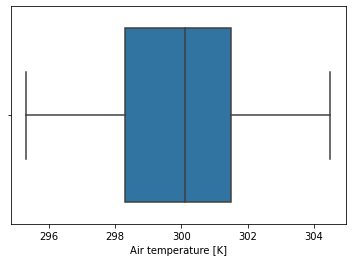

In [ ]:
sns.boxplot(df['Air temperature [K]'])

In [ ]:
sns.boxplot(df['Process temperature [K]'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Process temperature [K]'>

In [ ]:
sns.boxplot(df['Torque [Nm]'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Torque [Nm]'>

In [ ]:
df['Torque [Nm]'].skew()

-0.00951659584005855

# EDA using Bivariate & Multivariate analysis

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

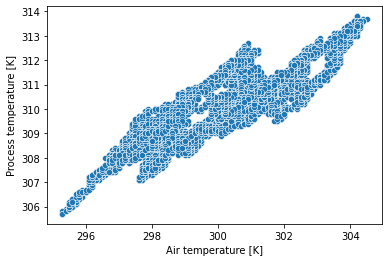

In [ ]:
sns.scatterplot(df['Air temperature [K]'],df['Process temperature [K]'])

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Type of Failure'],
      dtype='object')

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

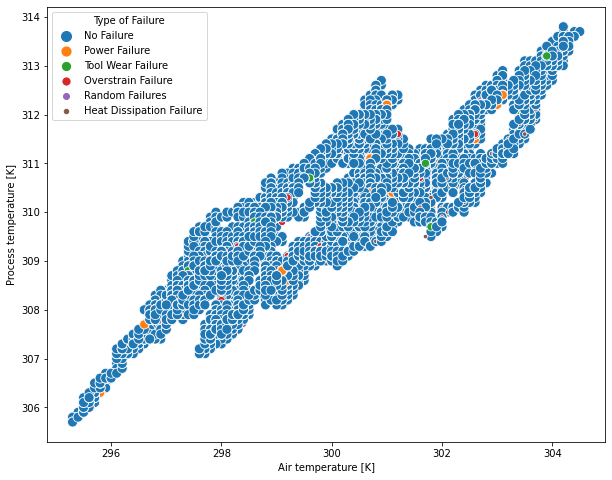

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df,x='Air temperature [K]',y='Process temperature [K]',hue='Type of Failure',size="Type of Failure",sizes=(20,100),legend="full")

## Bar Plot

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Type of Failure'>

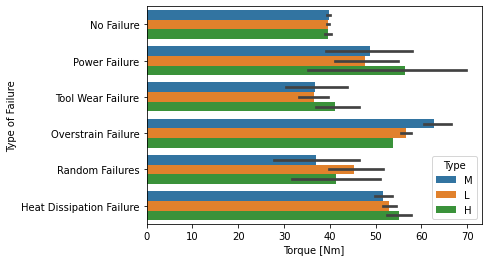

In [ ]:
sns.barplot(data=df,x='Torque [Nm]',y='Type of Failure',hue='Type')
# plt.xticks(rotation='vertical')

In [ ]:
df.corr()

Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.876107   
Process temperature [K]             0.876107                 1.000000   
Rotational speed [rpm]              0.022670                 0.019277   
Torque [Nm]                        -0.013778                -0.014061   
Tool wear [min]                     0.013853                 0.013488   
Target                              0.082556                 0.035946   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
Air temperature [K]                    0.022670    -0.013778         0.013853   
Process temperature [K]                0.019277    -0.014061         0.013488   
Rotational speed [rpm]                 1.000000    -0.875027         0.000223   
Torque [Nm]                           -0.875027     1.000000        -0.003093   
Tool wear [min]                        0.000223    -0.003093         1.000000   
Target                                -0.044188     0.191321         0.105448   

                           Target  
Air temperature [K]      0.082556  
Process temperature [K]  0.035946  
Rotational speed [rpm]  -0.044188  
Torque [Nm]              0.191321  
Tool wear [min]          0.105448  
Target                   1.000000

<AxesSubplot:>

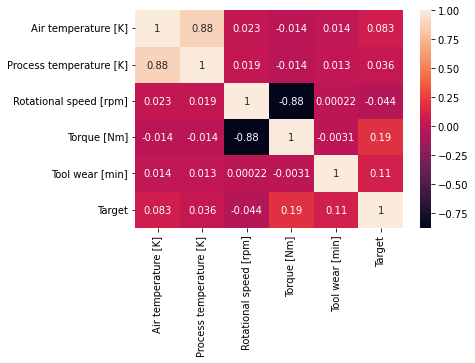

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
print("Mean value of Torque [Nm]",df['Torque [Nm]'].mean())
print("Std value of Torque [Nm]",df['Torque [Nm]'].std())
print("Min value of Torque [Nm]",df['Torque [Nm]'].min())
print("Max value of Torque [Nm]",df['Torque [Nm]'].max())

Mean value of Torque [Nm] 39.986909999999995
Std value of Torque [Nm] 9.968933725121337
Min value of Torque [Nm] 3.8
Max value of Torque [Nm] 76.6


In [ ]:
# Finding the boundary values
print("Highest allowed",df['Torque [Nm]'].mean() + 3*df['Torque [Nm]'].std())
print("Lowest allowed",df['Torque [Nm]'].mean() - 3*df['Torque [Nm]'].std())

Highest allowed 69.893711175364
Lowest allowed 10.080108824635985


In [ ]:
new_df = df[(df['Torque [Nm]'] < 69.89) & (df['Torque [Nm]'] > 10.08)]

In [ ]:
new_df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Type of Failure  
0         No Failure  
1         No Failure  
2         No Failure  
3         No Failure  
4         No Failure  
...              ...  
9995      No Failure  
9996      No Failure  
9997      No Failure  
9998      No Failure  
9999      No Failure  

[9975 rows x 8 columns]

In [ ]:
new_df.shape

(9975, 8)

In [ ]:
new_df.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count          9975.000000              9975.000000             9975.000000   
mean            300.004952               310.005293             1537.770326   
std               1.999341                 1.482894              174.381275   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2695.000000   

       Torque [Nm]  Tool wear [min]       Target  
count  9975.000000      9975.000000  9975.000000  
mean     39.977233       107.942957     0.031579  
std       9.845553        63.642261     0.174885  
min      10.700000         0.000000     0.000000  
25%      33.200000        53.000000     0.000000  
50%      40.100000       108.000000     0.000000  
75%      46.700000       162.000000     0.000000  
max      69.700000       253.000000     1.000000

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Torque [Nm]'>

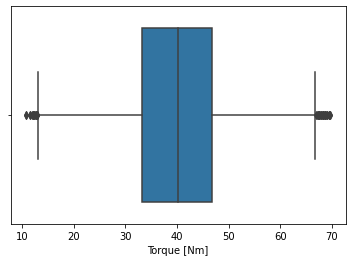

In [ ]:
sns.boxplot(new_df['Torque [Nm]'])

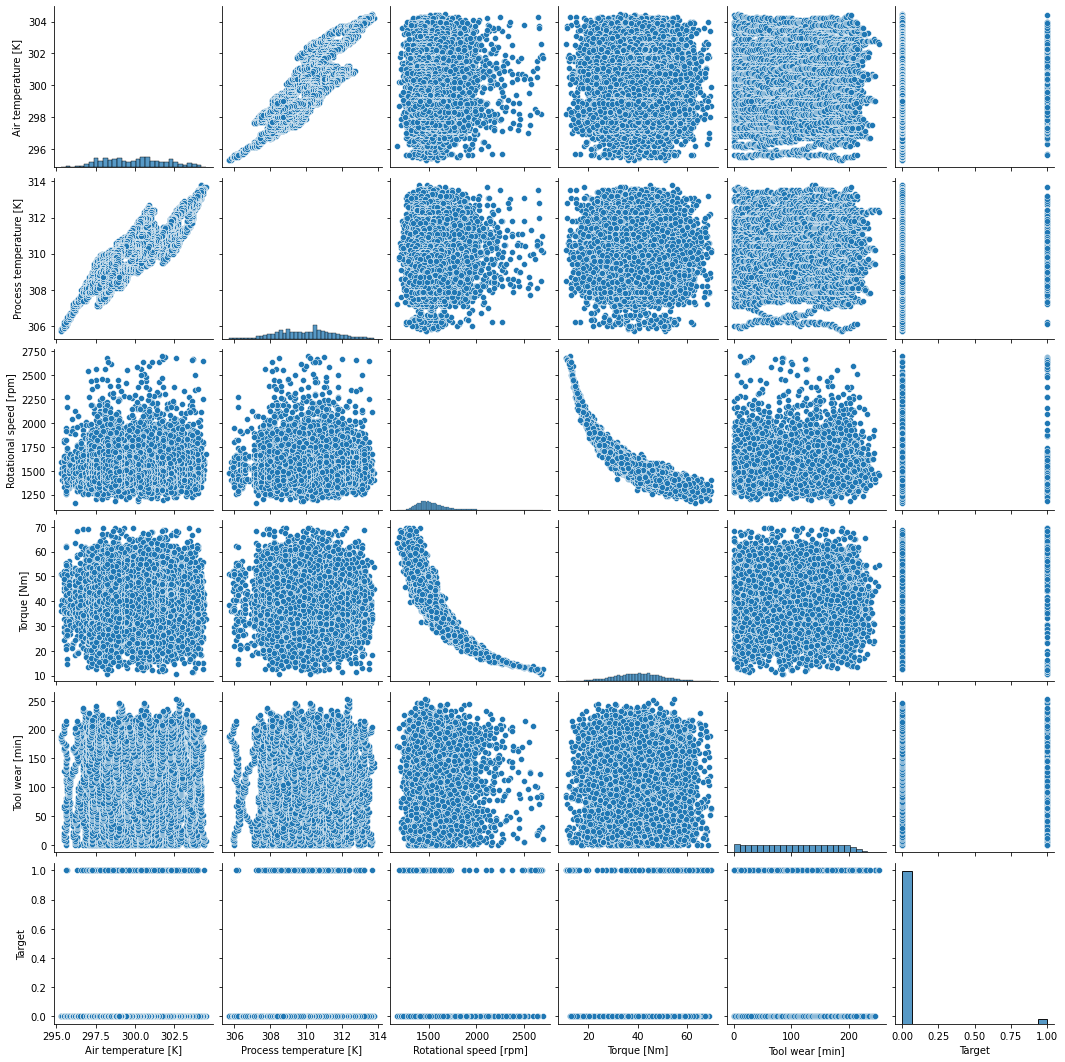

In [ ]:
sns.pairplot(new_df)

In [ ]:
new_df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Type of Failure  
0         No Failure  
1         No Failure  
2         No Failure  
3         No Failure  
4         No Failure  
...              ...  
9995      No Failure  
9996      No Failure  
9997      No Failure  
9998      No Failure  
9999      No Failure  

[9975 rows x 8 columns]

In [ ]:
new_df.replace(to_replace="No Failure",value="0")

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Type of Failure  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
9995               0  
9996               0  
9997               0  
9998               0  
9999               0  

[9975 rows x 8 columns]

In [ ]:
new_df['Type of Failure'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
final_df = new_df.replace(to_replace=['Power Failure', 'Tool Wear Failure','Overstrain Failure', 'Random Failures','Heat Dissipation Failure'],value='1')

In [ ]:
final_df = final_df.replace(to_replace="No Failure",value="0")

In [ ]:
final_df.head(2)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Type of Failure  
0         42.8                0       0               0  
1         46.3                3       0               0

In [ ]:
NEW_df = pd.get_dummies(final_df,columns=['Type'],drop_first=True)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NEW_df.drop('Type of Failure',axis=1),NEW_df['Type of Failure'],test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((7980, 8), (1995, 8))

# Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler on Train set
scaler.fit(X_train)

#transform train & test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
3496                301.9                    310.9                    1309   
5190                304.1                    313.2                    1452   
6008                300.7                    310.7                    1431   
1369                298.7                    310.3                    1481   
7329                299.9                    310.4                    1576   
...                   ...                      ...                     ...   
9250                298.3                    309.0                    1823   
4872                303.7                    312.4                    1316   
3274                301.3                    310.0                    1665   
9870                299.0                    309.9                    1884   
2741                299.6                    309.0                    1378   

      Torque [Nm]  Tool wear [min]  Target  Type_L  Type_M  
3496         48.0              124       0       1       0  
5190         48.0              126       0       1       0  
6008         39.3               22       0       1       0  
1369         41.5               83       0       0       1  
7329         34.3              188       0       0       1  
...           ...              ...     ...     ...     ...  
9250         25.9              181       0       0       0  
4872         59.3              137       0       1       0  
3274         31.4                0       0       1       0  
9870         25.6              100       0       0       0  
2741         51.9              162       0       1       0  

[7980 rows x 8 columns]

In [ ]:
X_train_scaled

array([[ 9.48994686e-01,  6.02244457e-01, -1.31094080e+00, ...,
        -1.79465857e-01,  8.19056940e-01, -6.52310594e-01],
       [ 2.04432690e+00,  2.14165657e+00, -4.93463568e-01, ...,
        -1.79465857e-01,  8.19056940e-01, -6.52310594e-01],
       [ 3.51540749e-01,  4.68382534e-01, -6.13512671e-01, ...,
        -1.79465857e-01,  8.19056940e-01, -6.52310594e-01],
       ...,
       [ 6.50267717e-01, -1.34197417e-04,  7.24177342e-01, ...,
        -1.79465857e-01,  8.19056940e-01, -6.52310594e-01],
       [-4.94852329e-01, -6.70651590e-02,  1.97611800e+00, ...,
        -1.79465857e-01, -1.22091634e+00, -6.52310594e-01],
       [-1.96125360e-01, -6.69443813e-01, -9.16493743e-01, ...,
        -1.79465857e-01,  8.19056940e-01, -6.52310594e-01]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.9974937343358395
Scaled 0.9974937343358395


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.9939849624060151
Scaled 0.9919799498746867


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d4b0e92c-1f8c-4804-84a2-d18aa04c8260' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>